In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
df = pd.read_csv("../data/raw/demand_data.csv")
df['Date'] = pd.to_datetime(df['Date'])

weekly_demand = (
    df.groupby('Date')['Weekly_Sales']
    .sum()
    .reset_index()
)

weekly_demand.set_index('Date', inplace=True)
weekly_demand = weekly_demand.sort_index()


In [3]:
train = weekly_demand.iloc[:-12]
test = weekly_demand.iloc[-12:]


In [4]:
model = ARIMA(train['Weekly_Sales'], order=(2,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)


/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [5]:
model = ARIMA(train['Weekly_Sales'], order=(2,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12)


/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/home/arya_stark/demand-forecasting-system/venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [6]:
mae = mean_absolute_error(test['Weekly_Sales'], forecast)
rmse = np.sqrt(mean_squared_error(test['Weekly_Sales'], forecast))

print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")


MAE: 1,497,542.00
RMSE: 1,898,715.64


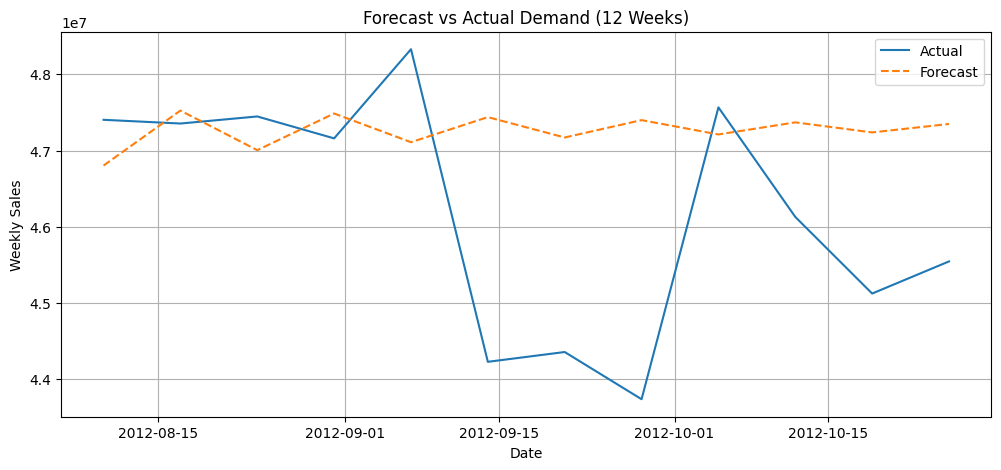

In [7]:
plt.figure(figsize=(12,5))
plt.plot(test.index, test['Weekly_Sales'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.title("Forecast vs Actual Demand (12 Weeks)")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True)
plt.show()
